In [21]:
import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv('placement.csv')

In [25]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


steps :

0. preprocess + EDA + Feature selection
1. extract input and output columns
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [30]:
df = df.iloc[:,1:]

In [32]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [34]:
import matplotlib.pyplot as plt

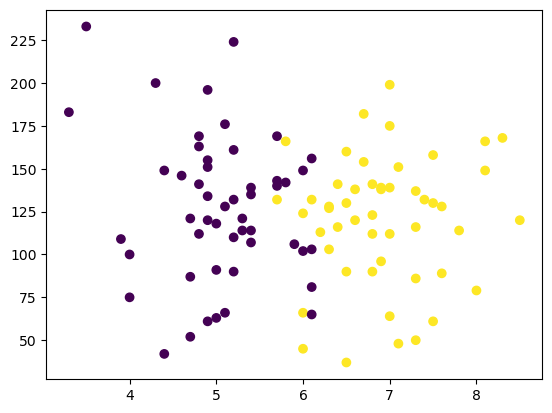

In [36]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) #here placement is coloured with the syntax c 

Logistic Regression - algorithm

When there is some linearity in data then we use logistic regression - it cuts the data in two parts where it sees some linearity in data, here it cuts the data in between the purple and yellow circles, it finds the line by its own for which line to be used  

In [39]:
X = df.iloc[:,0:2] #independent variable- cgpa and iq
Y = df.iloc[:,-1] #dependent variable - placement

In [41]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [43]:
Y.shape

(100,)

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [47]:
X_train

,cgpa,iq
56,6.1,65.0
50,3.5,233.0
31,3.9,109.0
45,6.0,66.0
89,4.9,151.0
...,...,...
74,6.7,154.0
95,4.3,200.0
68,4.0,75.0
84,5.7,169.0


In [49]:
Y_train

56    0
50    0
31    0
45    1
89    0
     ..
74    1
95    0
68    0
84    0
72    1
Name: placement, Length: 90, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [55]:
X_train = scaler.fit_transform(X_train)

In [57]:
X_train

array([[ 0.09966863, -1.56495766],
       [-2.14287553,  2.71623645],
       [-1.79786874, -0.44369254],
       [ 0.01341693, -1.53947437],
       [-0.93535175,  0.62660599],
       [ 1.22094071,  0.14242332],
       [ 0.87593391, -1.59044096],
       [ 0.70343052, -0.36724264],
       [-0.50409326, -0.49465913],
       [-1.71161704, -0.67304222],
       [ 1.13468901,  0.26983981],
       [ 0.44467542,  0.09145673],
       [-1.19410685,  0.4991895 ],
       [-0.76284835,  0.04049013],
       [-0.07283477, -0.52014243],
       [-0.67659666,  0.88143897],
       [ 0.87593391,  1.23820515],
       [-0.93535175, -1.66689086],
       [-2.31537893,  1.44207154],
       [-0.59034496, -0.31627605],
       [ 0.78968222, -0.77497542],
       [-0.93535175,  0.19338992],
       [ 0.87593391,  1.84980431],
       [-1.02160345,  0.37177301],
       [ 0.78968222,  0.29532311],
       [-1.02160345,  1.08530536],
       [-0.84910005, -0.90239191],
       [-1.10785515, -1.0043251 ],
       [-0.24533816,

In [59]:
X_test = scaler.transform(X_test)

In [61]:
X_test

array([[ 0.27217203,  0.04049013],
       [ 0.01341693,  0.57563939],
       [ 0.09966863, -0.59659233],
       [ 0.01341693, -2.07462363],
       [ 1.7384509 , -1.20819149],
       [ 0.01341693, -0.06144306],
       [ 0.96218561, -1.99817374],
       [-0.84910005, -1.61592426],
       [-0.59034496, -0.13789296],
       [-1.10785515, -0.13789296]])

In [63]:
#train the model
from sklearn.linear_model import LogisticRegression

In [65]:
clf = LogisticRegression()

In [67]:
#model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [69]:
Y_pred = clf.predict(X_test)

In [71]:
Y_test

63    1
33    0
14    0
10    1
58    1
27    1
5     1
7     0
2     0
24    0
Name: placement, dtype: int64

In [73]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(Y_test,Y_pred)

0.7

In [79]:
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [81]:
!pip install mlxtend

In [77]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

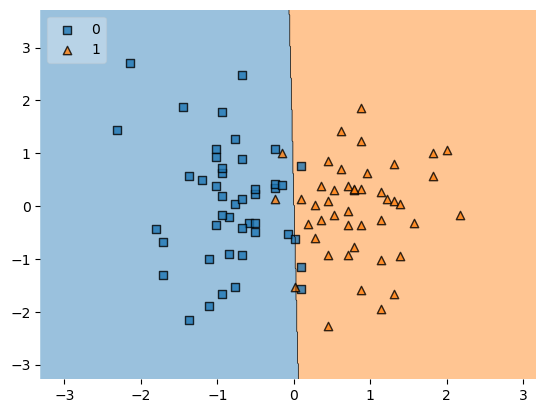

In [79]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [81]:
import pickle #pickle is used to export object to file

In [83]:
pickle.dump(clf,open('model.pkl','wb'))

Here model is been created and trained to check the placement if cgpa and iq are input from the user.
A website will be created which will ask for the cgpa and iq from the user and then it will say about the placement by giving the model.pkl to the website and then the website will be hosted in platforms like AWS, GCP or heroku(5 applications can be hosted for free).